In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [6]:
top_countries = df['country'].value_counts().head(10)
print(top_countries)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [7]:
all_genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
common_genres = all_genres.value_counts().head(10)
print(common_genres)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [8]:
releases_per_year = df['release_year'].value_counts().sort_index()
print(releases_per_year.tail(10))

release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64


In [9]:
rating_dist = df['rating'].value_counts()
print(rating_dist)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [10]:
top_directors = df['director'].value_counts().head(10)
print(top_directors)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


/tmp/ipython-input-53145520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette="pastel")


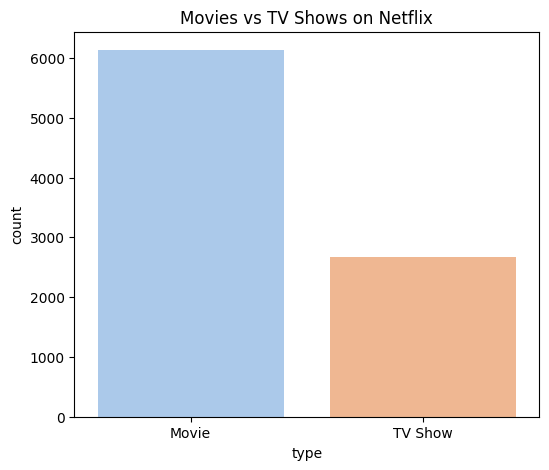

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(x='type', data=df, palette="pastel")
plt.title("Movies vs TV Shows on Netflix")
plt.show()

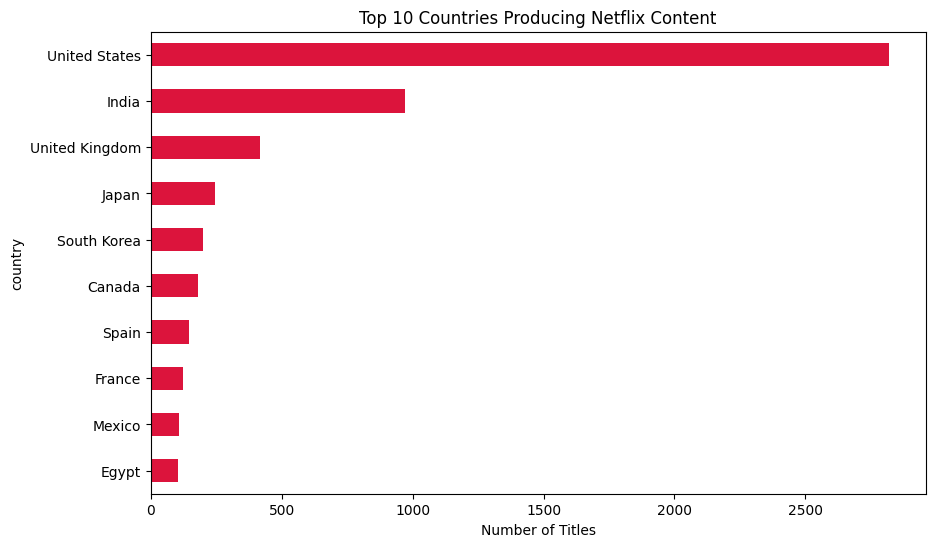

In [12]:
plt.figure(figsize=(10,6))
top_countries.plot(kind='barh', color='crimson')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()

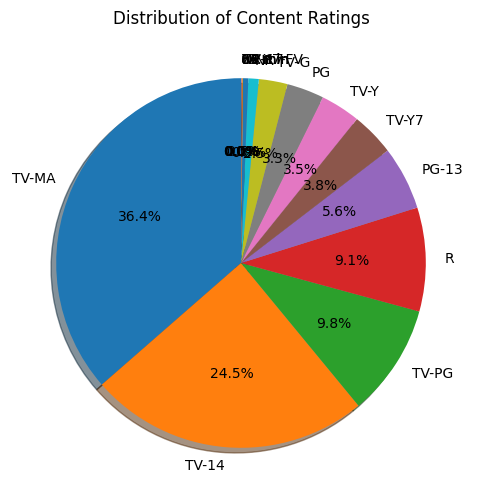

In [13]:
plt.figure(figsize=(8,6))
df['rating'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Distribution of Content Ratings")
plt.ylabel("")
plt.show()

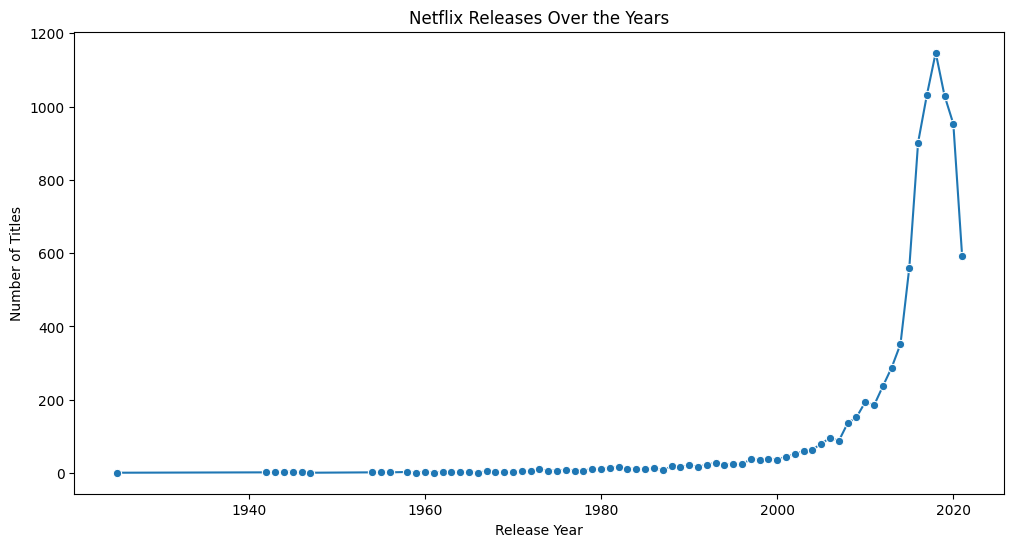

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(x=releases_per_year.index, y=releases_per_year.values, marker="o")
plt.title("Netflix Releases Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

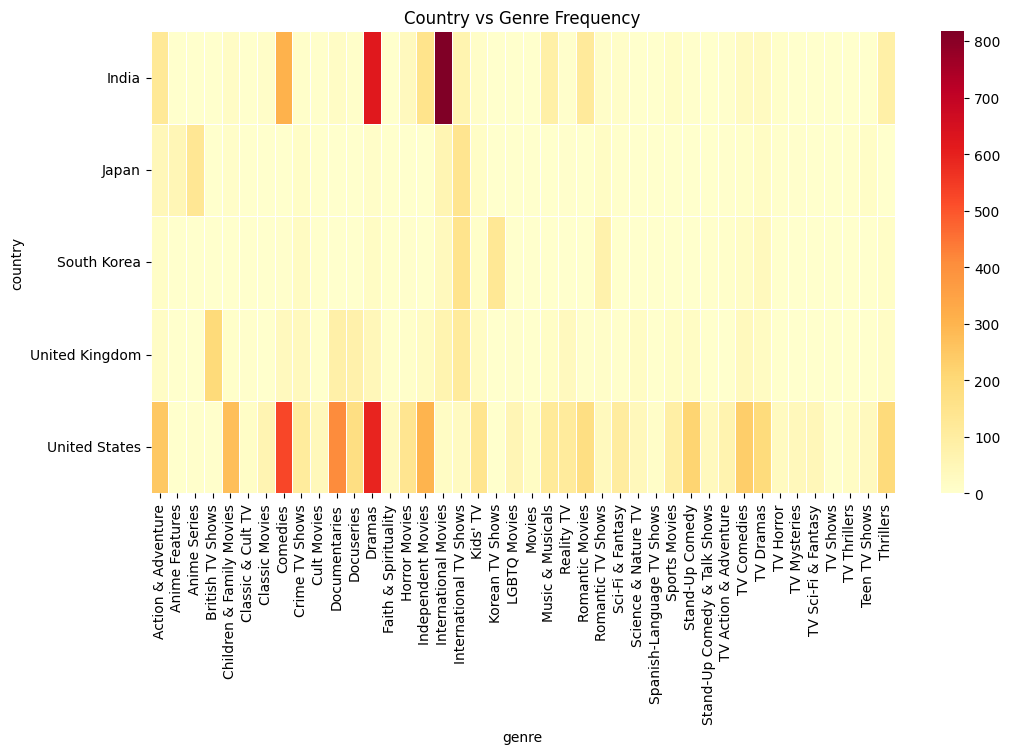

In [15]:
top5_countries = df['country'].value_counts().head(5).index

subset = df[df['country'].isin(top5_countries)]
country_genre = subset.assign(genre=subset['listed_in'].str.split(',')).explode('genre')
country_genre['genre'] = country_genre['genre'].str.strip()

pivot_table = pd.crosstab(country_genre['country'], country_genre['genre'])

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlOrRd", linewidths=0.5)
plt.title("Country vs Genre Frequency")
plt.show()
